In [4]:
import numpy as np
from baryrat import brasil, aaa
import matplotlib.pyplot as plt

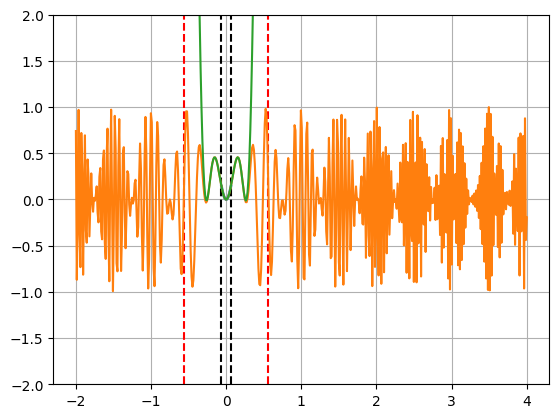

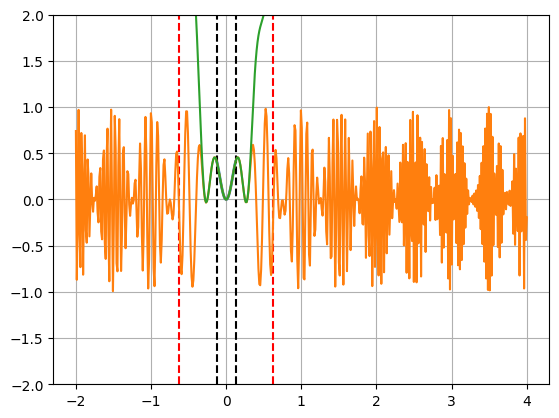

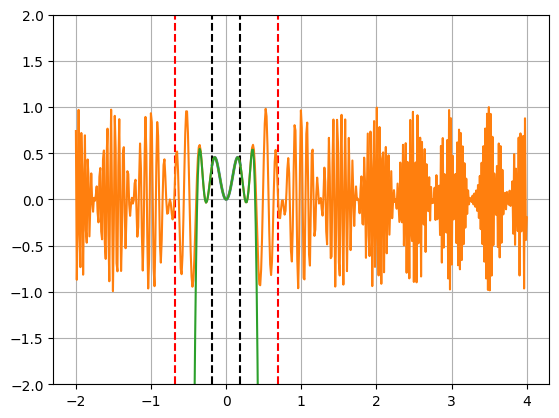

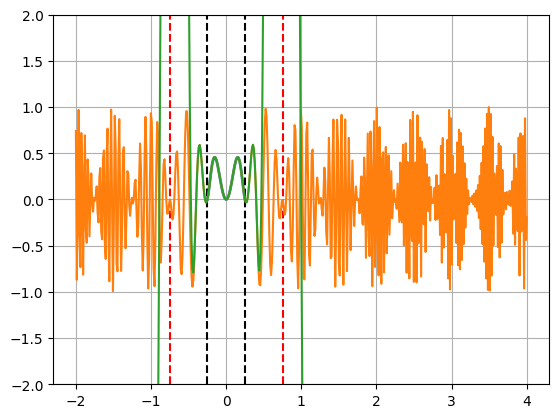

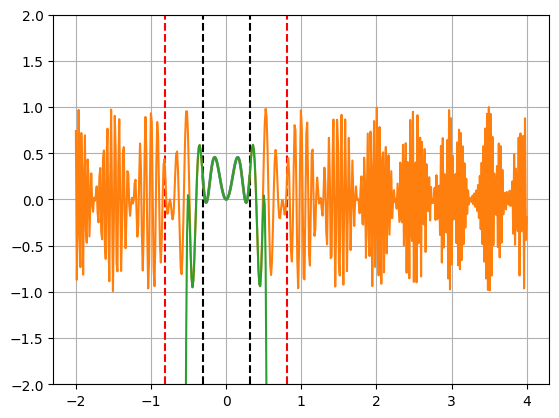

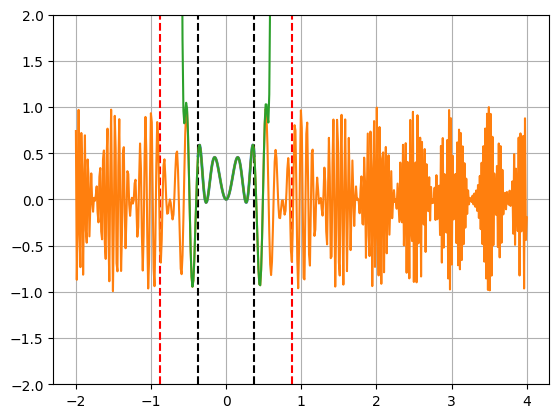

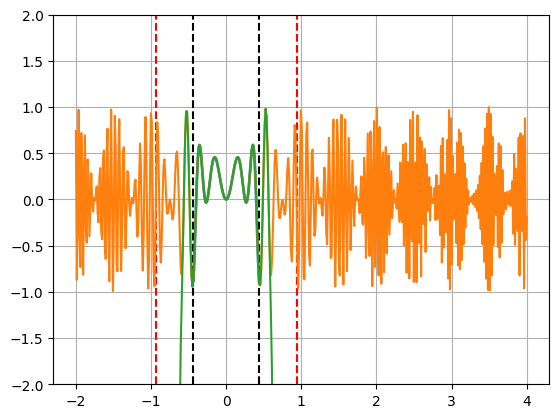

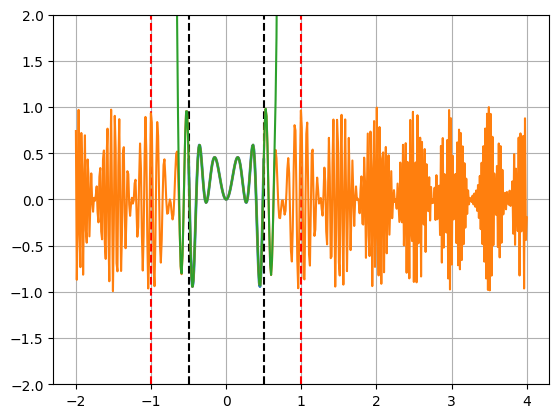

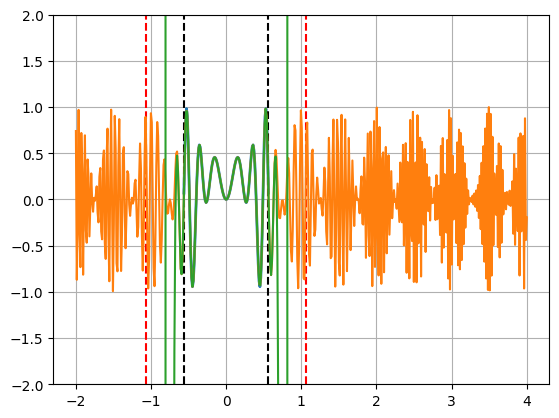

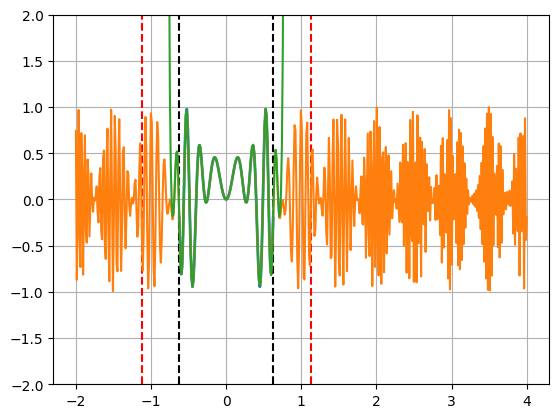

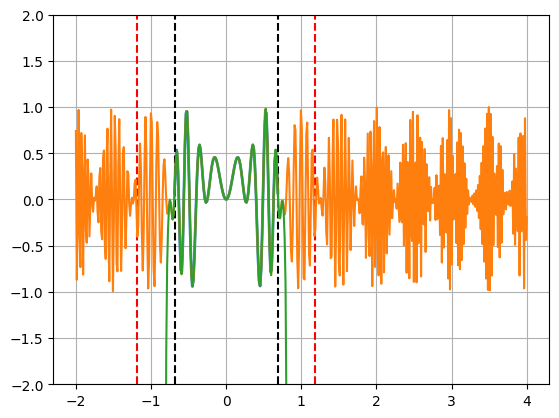

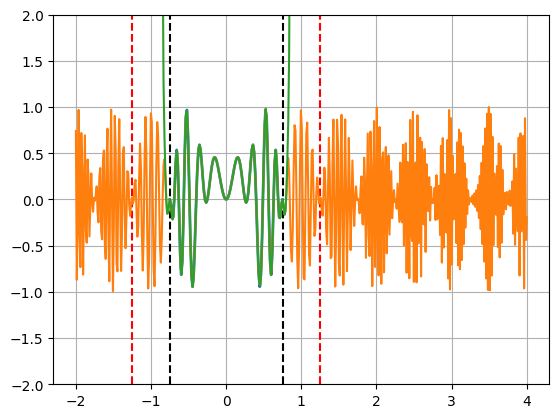

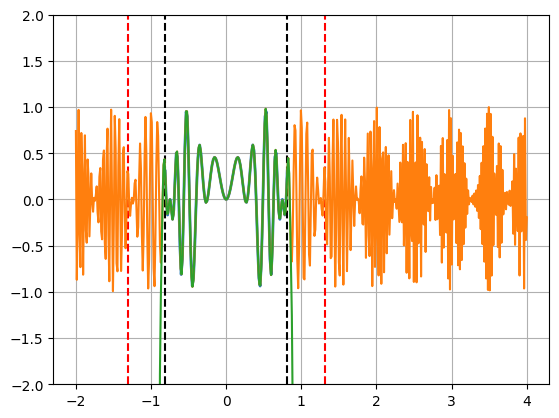

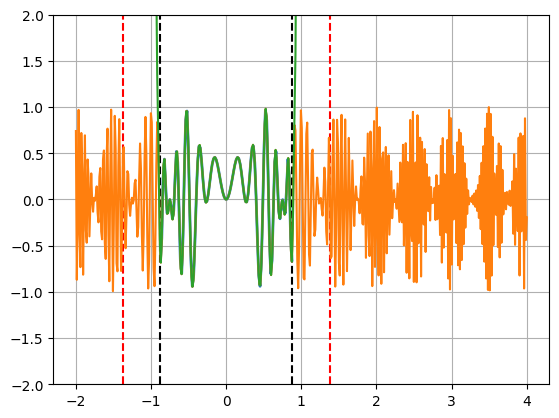

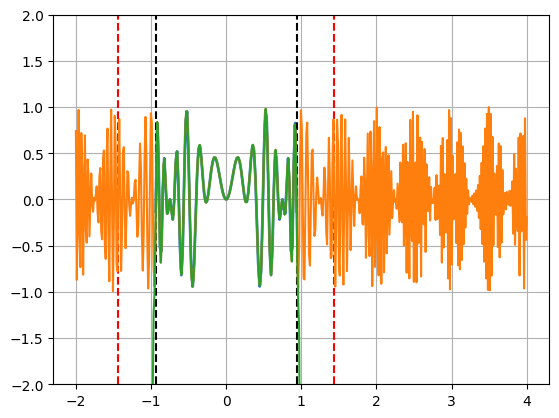

In [7]:
wl = 1
k = 2*np.pi/wl

for i in np.arange(1/16, 1, step=1/16):
    x_lim = np.linspace(-i, i, 100)
    r = aaa(x_lim, np.cos(k*x_lim)*np.sin((k*x_lim)**2))
    me = 1 + wl/((np.max(x_lim) - np.min(x_lim)))
    # print('me', me)
    xi = np.linspace(-2, 4, 500)
    plt.figure()
    plt.plot(x_lim, np.cos(k*x_lim)*np.sin((k*x_lim)**2), '-', linewidth=2)
    plt.plot((np.min(x_lim), np.min(x_lim)), (-2, 2), 'k--')
    plt.plot((np.max(x_lim), np.max(x_lim)), (-2, 2), 'k--')
    plt.plot((me*np.min(x_lim), me*np.min(x_lim)), (-2, 2), 'r--')
    plt.plot((me*np.max(x_lim), me*np.max(x_lim)), (-2, 2), 'r--')
    plt.plot(xi, np.cos(k*xi)*np.sin((k*xi)**2))
    # print(xi[np.argmax(np.abs(np.cos(k*xi)*np.sin((k*xi)**2) - r(xi)) <= 1e-2)])
    # print()
    plt.plot(xi, r(xi))
    plt.ylim(-2, 2)
    plt.grid()

(-8.0, 8.0)

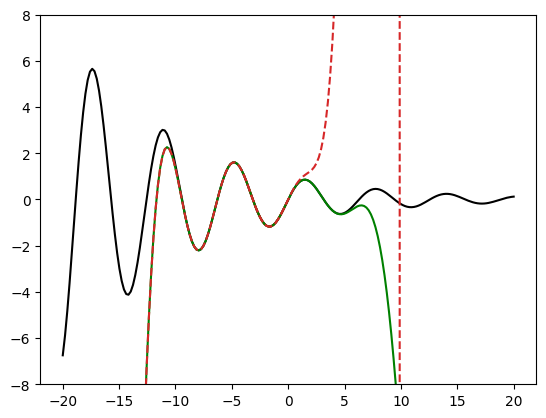

In [73]:
x = np.linspace(-20, 20, 200)
f = lambda x: np.sin(x)*np.exp(-x/10)
xi = np.linspace(-4, 0, 200)
r = aaa(xi, f(xi))
xi2 = np.linspace(-8, -4, 200)
r2 = aaa(xi2, r(xi2))
plt.plot(x, f(x), 'k-')
plt.plot(xi, f(xi), 'r-')
plt.plot(x, r(x), '-', color='green')
plt.plot(x, r2(x), '--', color='tab:red')
plt.ylim(-8, 8)

In [2]:
# from baryrat import BarycentricRational

# def aaa(Z, F, tol=1e-13, mmax=100, return_errors=False):
#     """Compute a rational approximation of `F` over the points `Z` using the
#     AAA algorithm.

#     Arguments:
#         Z (array): the sampling points of the function. Unlike for interpolation
#             algorithms, where a small number of nodes is preferred, since the
#             AAA algorithm chooses its support points adaptively, it is better
#             to provide a finer mesh over the support.
#         F: the function to be approximated; can be given as a function or as an
#             array of function values over ``Z``.
#         tol: the approximation tolerance
#         mmax: the maximum number of iterations/degree of the resulting approximant
#         return_errors: if `True`, also return the history of the errors over
#             all iterations

#     Returns:
#         BarycentricRational: an object which can be called to evaluate the
#         rational function, and can be queried for the poles, residues, and
#         zeros of the function.

#     For more information, see the paper

#       | The AAA Algorithm for Rational Approximation
#       | Yuji Nakatsukasa, Olivier Sete, and Lloyd N. Trefethen
#       | SIAM Journal on Scientific Computing 2018 40:3, A1494-A1522
#       | https://doi.org/10.1137/16M1106122

#     as well as the Chebfun package <http://www.chebfun.org>. This code is an
#     almost direct port of the Chebfun implementation of aaa to Python.
#     """
#     Z = np.asanyarray(Z).ravel()
#     if callable(F):
#         # allow functions to be passed
#         F = F(Z)
#     F = np.asanyarray(F).ravel()

#     J = list(range(len(F)))
#     zj = np.empty(0, dtype=Z.dtype)
#     fj = np.empty(0, dtype=F.dtype)
#     C = []
#     errors = []

#     reltol = tol * np.linalg.norm(F, np.inf)

#     R = np.mean(F) * np.ones_like(F)

#     for m in range(mmax):
#         # find largest residual
#         jj = np.argmax(abs(F - R))
#         zj = np.append(zj, (Z[jj],))
#         fj = np.append(fj, (F[jj],))
#         J.remove(jj)

#         # Cauchy matrix containing the basis functions as columns
#         C = 1.0 / (Z[J,None] - zj[None,:])
#         # Loewner matrix
#         A = (F[J,None] - fj[None,:]) * C

#         # compute weights as right singular vector for smallest singular value
#         _, _, Vh = np.linalg.svd(A)
#         wj = Vh[-1, :].conj()

#         # approximation: numerator / denominator
#         N = C.dot(wj * fj)
#         D = C.dot(wj)

#         # update residual
#         R = F.copy()
#         R[J] = N / D

#         # check for convergence
#         errors.append(np.linalg.norm(F - R, np.inf))
#         if errors[-1] <= reltol:
#             break

#     r = BarycentricRational(zj, fj, wj)
#     return (r, errors) if return_errors else r


#### Testing

In [2]:
# Define analytical functions for comparison with numerical results
v_ex = lambda k: np.sqrt(1+4*(k**2))
f_ex = lambda eps, k: (
    (v_ex(k)**6 - (v_ex(k)**4 - 8*v_ex(k)*k*eps)**(3/2))/(96*(k**3))
    - v_ex(k)**3/(8*(k**2)) * eps + v_ex(k)**2/(4*k) * eps**2
    )
Phi_ex = lambda eps, k: v_ex(k)/(v_ex(k)**4 - 8*v_ex(k)*k*eps)**(1/4)

Theta_ex = lambda eps, k: (
    (8*(k**4) - (v_ex(k)**4))
    / (8*(k**2) * v_ex(k)) * eps
    + (1/(4*k)) * (eps **2)
    + ((v_ex(k)**6) - (v_ex(k)**4 - 8 * k * v_ex(k) * eps)**(3/2))
    / (96*(k**3))
    )

In [121]:
# f = lambda x: f_ex(x, k=2)
f = lambda x: np.sin(x) * x
xi = np.linspace(0, 2, 1000)
F = f(xi)
r = aaa(xi, F)

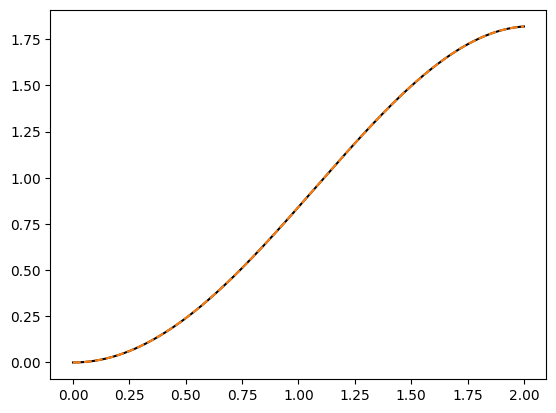

In [122]:
plt.plot(xi, F, 'k-')
plt.plot(xi, r(xi), '--', color='tab:orange')

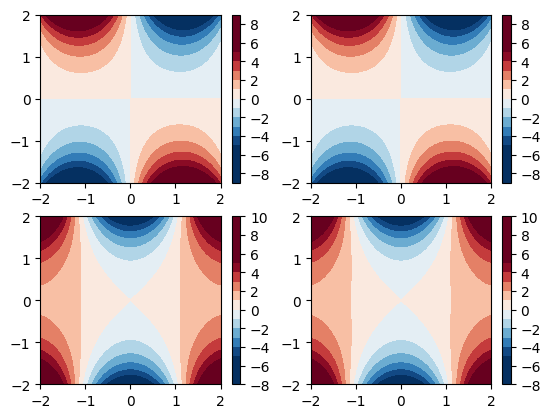

In [126]:
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, y, indexing='ij')
Z = X + 1j*Y

vmin, vmax = -5, 5

plt.subplot(2, 2, 1)
plt.contourf(X, Y, -np.imag(f(Z)), levels=20, vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.contourf(X, Y, -np.imag(r(Z)), levels=20, vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.contourf(X, Y, np.real(f(Z)), levels=20, vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.contourf(X, Y, np.real(r(Z)), levels=20, vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.colorbar()

plt.show()

ddf0 [1.9998822] 
 alpha: [0.] 
 sigma_p/np.pi: [0.25] 
 sigma_m/np.pi: [-0.75]


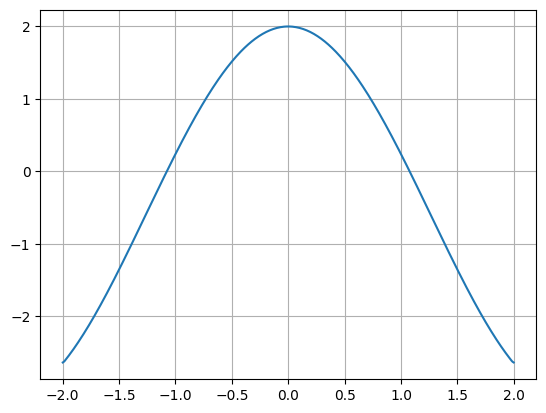

In [142]:
import finite_diff as fd

ddf0 = fd.local_grad(f(x), int(np.argmin(np.abs(x - 0))), x, order=2)
alpha = np.angle(ddf0)
sigma_p = -np.pi/4 - alpha/2 + np.pi/2
sigma_m = -np.pi/4 - alpha/2 - np.pi/2
print('ddf0', ddf0,
      '\n',
      'alpha:', alpha,
      '\n',
      'sigma_p/np.pi:', sigma_p/np.pi,
      '\n',
      'sigma_m/np.pi:', sigma_m/np.pi)

plt.plot(x, fd.grad(fd.grad(f(x), x), x))
plt.grid()

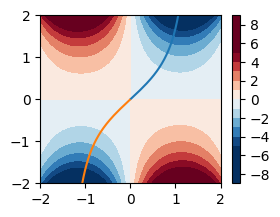

In [154]:
from skimage.measure import find_contours

plt.subplot(2, 2, 1)
plt.contourf(X, Y, -np.imag(f(Z)), levels=20, vmin=vmin, vmax=vmax, cmap='RdBu_r')
plt.colorbar()

mask_p = (np.angle(Z) < sigma_p + np.pi/8) & (np.angle(Z) > sigma_p - np.pi/8)
contours_p = find_contours(np.real(r(Z)), 0, mask=mask_p)
for contour in contours_p:
    xcont = np.min(x) + (np.max(x) - np.min(x)) * contour[:, 0]/Z.shape[0]
    ycont = np.min(y) + (np.max(y) - np.min(y)) * contour[:, 1]/Z.shape[1]
    # plt.plot(x[(contour[:, 0]).astype(int)], y[(contour[:, 1]).astype(int)])
    plt.plot(xcont, ycont)
    # plt.plot(contour[:, 0], contour[:, 1])

mask_m = (np.angle(Z) < sigma_m + np.pi/8) & (np.angle(Z) > sigma_m - np.pi/8)
contours_m = find_contours(np.real(r(Z)), 0, mask=mask_m)
for contour in contours_m:
    xcont = np.min(x) + (np.max(x) - np.min(x)) * contour[:, 0]/Z.shape[0]
    ycont = np.min(y) + (np.max(y) - np.min(y)) * contour[:, 1]/Z.shape[1]
    # plt.plot(x[(contour[:, 0]).astype(int)], y[(contour[:, 1]).astype(int)])
    plt.plot(xcont, ycont)
    # plt.plot(contour[:, 0], contour[:, 1])

In [98]:
np.argmin(np.abs(x - 0))

(500,)

In [102]:
int(np.argmin(np.abs(x - 0)))

250

(array([1.9998822]), array([0.]))

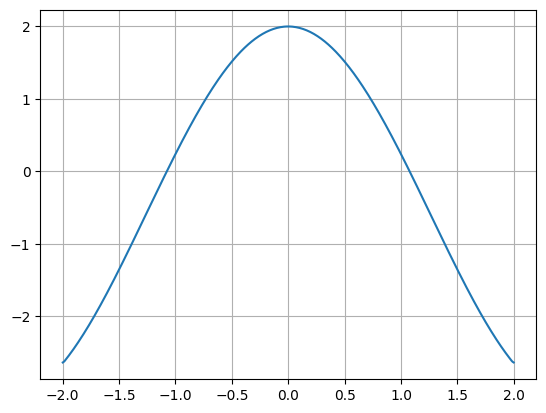

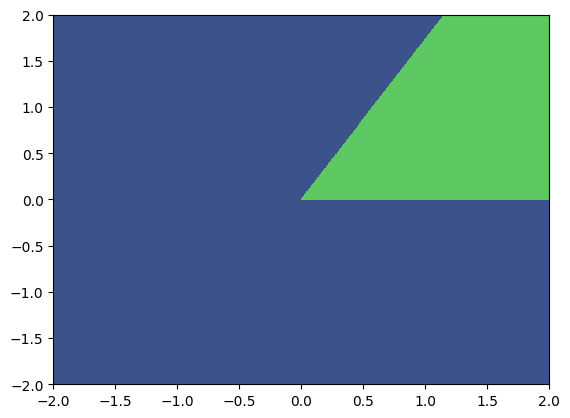

In [70]:
plt.contourf(X, Y, (np.angle(Z) < np.pi/3) & (np.angle(Z) > 0))

In [10]:
import sys
sys.path.append('../')
import util as ut
import finite_diff as fd

def norm(a):
    return np.sqrt(ut.inner_product(a, a))

def dist(a, b):
    return norm(a - b)

c = np.vstack([xcont, ycont]).T
dc = np.diff(c, axis=0)
li = np.sqrt(ut.inner_product(dc, dc))
it0 = np.argmin(dist(c, np.zeros_like(c)))

# li = np.sqrt(np.diff(xcont)**2 + np.diff(ycont)**2)
l_tmp = np.hstack([np.array([0]), np.cumsum(li)])
l = l_tmp - l_tmp[it0]

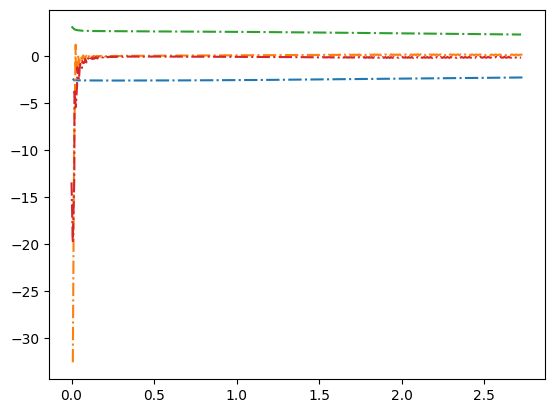

In [59]:
masks = ut.get_masks_of_const_sgn(l, ND=1)
angless = np.angle(xcont + 1j*ycont)

ls = []
angles = []
xs = []
ys = []
Fs = []

for i, mask in enumerate(masks):
    ls.append(np.abs(l[mask]))
    angles.append(angless[mask])
    xs.append(xcont[mask])
    ys.append(ycont[mask])
    Fs.append( -np.imag(r(xs[i] + 1j*ys[i])) )

for i, mask in enumerate(masks):
    # plt.plot(xs[i], ys[i])
    # plt.plot(ls[i], Fs[i])
    r_tmp = aaa(ls[i], Fs[i])

    larray = np.linspace(0, np.max(ls[i]))

    # plt.plot(larray, r_tmp(larray))
    # plt.plot(larray, fd.grad(r_tmp(larray), larray), '--')
    plt.plot(ls[i], angles[i], '-.')
    # plt.ylim(-0.01, 0.01)
    # fs.append(r(xcont[mask] + 1j*ycont([mask]))
    # ls.append(np.abs(l[mask]))
    # rs.append()

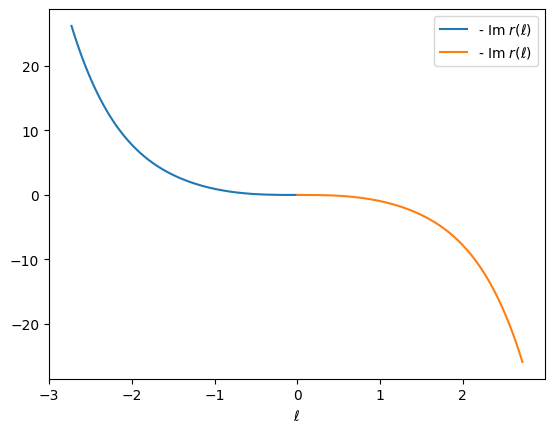

In [54]:
for mask in masks:
    plt.plot(l[mask], -np.imag(r(xcont[mask] + 1j*ycont[mask])), label='- Im $r(\ell)$')
    # plt.plot(l[mask], np.real(r(xcont[mask] + 1j*ycont[mask])), label='Re $r(\ell)$')
    plt.legend()
    plt.xlabel('$\ell$')
    plt.grid()

(928,)

In [193]:
dist(c, np.zeros_like(c)).shape, l.shape

((928,), (928,))

In [185]:
li = np.sqrt(np.diff(xcont)**2 + np.diff(ycont)**2)
l = np.hstack([np.array([0]), np.cumsum(li)])

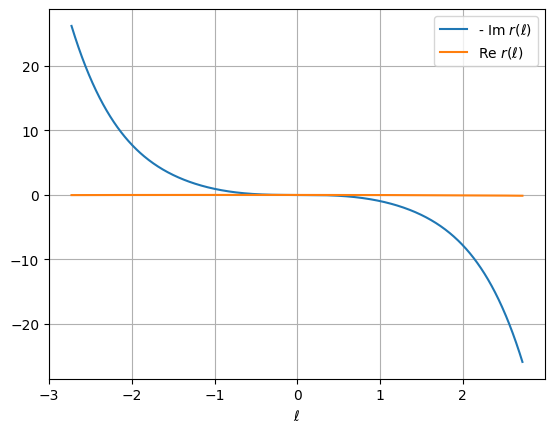

In [8]:
plt.plot(l, -np.imag(r(xcont + 1j*ycont)), label='- Im $r(\ell)$')
plt.plot(l, np.real(r(xcont + 1j*ycont)), label='Re $r(\ell)$')
plt.legend()
plt.xlabel('$\ell$')
plt.grid()

# Old Stuff

In [84]:
f = lambda x: np.sin(x) * np.exp(x)
r = brasil(f, [0, 4*np.pi], 5)

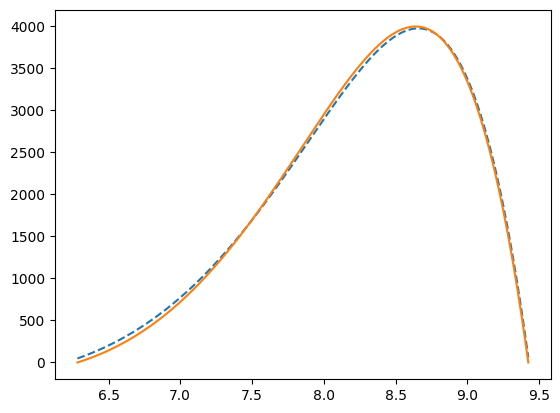

In [85]:
xi = np.linspace(2*np.pi, 3*np.pi, 200)
plt.plot(xi, r(xi), '--')
plt.plot(xi, f(xi))

**aaa algorithm**

In [86]:
import sympy as sp
_x = sp.symbols('x')
_f = sp.sin(_x) * sp.exp(_x)
sp.diff(_f, _x), sp.diff(_f, _x, 2)

(exp(x)*sin(x) + exp(x)*cos(x), 2*exp(x)*cos(x))

In [87]:
xi = np.linspace(0, 2*np.pi, 1000)
f = lambda x: np.sin(x) * np.exp(x)
dfdx = lambda x: np.exp(x) * (np.sin(x) + np.cos(x))
dfdx2 = lambda x: 2 * np.exp(x) * np.cos(x)
F = f(xi)

r = aaa(xi, F)

In [88]:
r.eval_deriv(xi[0], 2)

2.000000000110454

In [89]:
eps_rho = np.array([0.        , 0.04593935, 0.09175241, 0.13743917, 0.18299963,
       0.22843379, 0.27374166, 0.31892322, 0.36397848, 0.40890745,
       0.45371012, 0.4983865 , 0.54293657, 0.58736035, 0.63165782,
       0.675829  , 0.71987388, 0.76379247, 0.80758475, 0.85125074,
       0.89479043, 0.93820383, 0.98149092, 1.02465172, 1.06768621,
       1.11059442, 1.15337632, 1.19603192, 1.23856123, 1.28096424,
       1.32324095, 1.36539136, 1.40741547, 1.44931328, 1.4910848 ,
       1.53273001, 1.57424893, 1.61564156, 1.65690788, 1.69804791,
       1.73906163, 1.77994906, 1.82071019, 1.86134503, 1.90185356,
       1.9422358 , 1.98249174, 2.02262138, 2.06262472, 2.10250177,
       2.14225251, 2.18187696, 2.22137511, 2.26074696, 2.29999251,
       2.33911177, 2.37810472, 2.41697138, 2.45571174, 2.4943258 ,
       2.53281356, 2.57117503, 2.60941019, 2.64751906, 2.68550163,
       2.7233579 , 2.76108787, 2.79869155, 2.83616893, 2.87352   ,
       2.91074479, 2.94784327, 2.98481545, 3.02166134, 3.05838093,
       3.09497422, 3.13144121, 3.16778191, 3.20399631, 3.24008441,
       3.27604621, 3.31188171, 3.34759092, 3.38317382, 3.41863043,
       3.45396074, 3.48916476, 3.52424247, 3.55919389, 3.59401901,
       3.62871783, 3.66329035, 3.69773657, 3.7320565 , 3.76625012,
       3.80031745, 3.83425848, 3.86807321, 3.90176165, 3.93532378,
       3.96875962, 4.00206916, 4.0352524 , 4.06830934, 4.10123999,
       4.13404433, 4.16672238, 4.19927413, 4.23169958, 4.26399874,
       4.29617159, 4.32821815, 4.36013841, 4.39193237, 4.42360003,
       4.45514139, 4.48655646, 4.51784522, 4.54900769, 4.58004386,
       4.61095374, 4.64173731, 4.67239459, 4.70292556, 4.73333025,
       4.76360863, 4.79376071, 4.8237865 , 4.85368598, 4.88345917,
       4.91310607, 4.94262666, 4.97202096, 5.00128895, 5.03043065,
       5.05944606, 5.08833516, 5.11709797, 5.14573447, 5.17424468,
       5.20262859, 5.23088621, 5.25901752, 5.28702254, 5.31490126,
       5.34265368, 5.3702798 , 5.39777962, 5.42515315, 5.45240038,
       5.47952131, 5.50651594, 5.53338427, 5.5601263 , 5.58674204,
       5.61323148, 5.63959462, 5.66583146, 5.69194201, 5.71792625,
       5.7437842 , 5.76951585, 5.7951212 , 5.82060025, 5.84595301,
       5.87117946, 5.89627962, 5.92125348, 5.94610104, 5.97082231,
       5.99541727, 6.01988594, 6.04422831, 6.06844438, 6.09253415,
       6.11649762, 6.1403348 , 6.16404568, 6.18763026, 6.21108854,
       6.23442052, 6.25762621, 6.28070559, 6.30365868, 6.32648547,
       6.34918596, 6.37176016, 6.39420805, 6.41652965, 6.43872495,
       6.46079395, 6.48273666, 6.50455306, 6.52624317, 6.54780698,
       6.56924449, 6.5905557 , 6.61174062, 6.63279923, 6.65373155,
       6.67453757, 6.6952173 , 6.71577072, 6.73619785, 6.75649868,
       6.77667321, 6.79672144, 6.81664337, 6.83643901, 6.85610835,
       6.87565138, 6.89506813, 6.91435857, 6.93352271, 6.95256056,
       6.97147211, 6.99025736, 7.00891631, 7.02744897, 7.04585532,
       7.06413538, 7.08228914, 7.1003166 , 7.11821776, 7.13599263,
       7.1536412 , 7.17116346, 7.18855943, 7.20582911, 7.22297248,
       7.23998956, 7.25688034, 7.27364481, 7.290283  , 7.30679488,
       7.32318047, 7.33943975, 7.35557274, 7.37157943, 7.38745982,
       7.40321392, 7.41884171, 7.43434321, 7.44971841, 7.46496731,
       7.48008992, 7.49508622, 7.50995623, 7.52469994, 7.53931735,
       7.55380846, 7.56817328, 7.5824118 , 7.59652401, 7.61050993,
       7.62436956, 7.63810288, 7.65170991, 7.66519064, 7.67854507,
       7.6917732 , 7.70487503, 7.71785057, 7.7306998 , 7.74342274,
       7.75601939, 7.76848973, 7.78083377, 7.79305152, 7.80514297,
       7.81710812, 7.82894697, 7.84065953, 7.85224578, 7.86370574,
       7.8750394 , 7.88624676, 7.89732783, 7.90828259, 7.91911106,
       7.92981323, 7.9403891 , 7.95083867, 7.96116195, 7.97135892,
       7.9814296 , 7.99137398, 8.00119206, 8.01088385, 8.02044933,
       8.02988852, 8.03920141, 8.048388  , 8.0574483 , 8.06638229,
       8.07518999, 8.08387139, 8.09242649, 8.10085529, 8.10915779,
       8.117334  , 8.12538391, 8.13330752, 8.14110483, 8.14877584,
       8.15632055, 8.16373897, 8.17103109, 8.17819691, 8.18523643,
       8.19214966, 8.19893658, 8.20559721, 8.21213154, 8.21853957,
       8.22482131, 8.23097674, 8.23700588, 8.24290872, 8.24868526,
       8.2543355 , 8.25985945, 8.26525709, 8.27052844, 8.27567349,
       8.28069224, 8.2855847 , 8.29035085, 8.29499071, 8.29950427,
       8.30389153, 8.30815249, 8.31228716, 8.31629553, 8.32017759,
       8.32393336, 8.32756284, 8.33106601, 8.33444289, 8.33769346,
       8.34081774, 8.34381572, 8.34668741, 8.34943279, 8.35205188,
       8.35454467, 8.35691116, 8.35915135, 8.36126525, 8.36325284,
       8.36511414, 8.36684914, 8.36845784, 8.36994024, 8.37129635,
       8.37252616, 8.37362967, 8.37460688, 8.37545779, 8.3761824 ,
       8.37678072, 8.37725274, 8.37759846, 8.37781788, 8.377911  ])
F = np.array([0.00000000e+00, 5.96892465e-03, 2.38095921e-02, 5.34227950e-02,
       9.47096054e-02, 1.47571373e-01, 2.11909728e-01, 2.87626574e-01,
       3.74624102e-01, 4.72804780e-01, 5.82071357e-01, 7.02326858e-01,
       8.33474586e-01, 9.75418122e-01, 1.12806133e+00, 1.29130835e+00,
       1.46506361e+00, 1.64923181e+00, 1.84371793e+00, 2.04842723e+00,
       2.26326524e+00, 2.48813778e+00, 2.72295095e+00, 2.96761113e+00,
       3.22202496e+00, 3.48609939e+00, 3.75974162e+00, 4.04285915e+00,
       4.33535975e+00, 4.63715146e+00, 4.94814262e+00, 5.26824184e+00,
       5.59735798e+00, 5.93540023e+00, 6.28227804e+00, 6.63790113e+00,
       7.00217952e+00, 7.37502347e+00, 7.75634356e+00, 8.14605063e+00,
       8.54405579e+00, 8.95027045e+00, 9.36460629e+00, 9.78697526e+00,
       1.02172896e+01, 1.06554618e+01, 1.11014048e+01, 1.15550314e+01,
       1.20162552e+01, 1.24849898e+01, 1.29611489e+01, 1.34446470e+01,
       1.39353984e+01, 1.44333178e+01, 1.49383203e+01, 1.54503213e+01,
       1.59692362e+01, 1.64949810e+01, 1.70274718e+01, 1.75666251e+01,
       1.81123575e+01, 1.86645860e+01, 1.92232279e+01, 1.97882007e+01,
       2.03594223e+01, 2.09368107e+01, 2.15202843e+01, 2.21097619e+01,
       2.27051622e+01, 2.33064046e+01, 2.39134086e+01, 2.45260938e+01,
       2.51443805e+01, 2.57681888e+01, 2.63974395e+01, 2.70320533e+01,
       2.76719516e+01, 2.83170557e+01, 2.89672873e+01, 2.96225685e+01,
       3.02828216e+01, 3.09479690e+01, 3.16179338e+01, 3.22926389e+01,
       3.29720078e+01, 3.36559642e+01, 3.43444321e+01, 3.50373356e+01,
       3.57345993e+01, 3.64361481e+01, 3.71419069e+01, 3.78518011e+01,
       3.85657564e+01, 3.92836987e+01, 4.00055542e+01, 4.07312494e+01,
       4.14607110e+01, 4.21938660e+01, 4.29306418e+01, 4.36709659e+01,
       4.44147663e+01, 4.51619710e+01, 4.59125086e+01, 4.66663076e+01,
       4.74232972e+01, 4.81834065e+01, 4.89465651e+01, 4.97127029e+01,
       5.04817499e+01, 5.12536365e+01, 5.20282934e+01, 5.28056515e+01,
       5.35856421e+01, 5.43681966e+01, 5.51532468e+01, 5.59407249e+01,
       5.67305630e+01, 5.75226939e+01, 5.83170504e+01, 5.91135658e+01,
       5.99121734e+01, 6.07128070e+01, 6.15154006e+01, 6.23198885e+01,
       6.31262053e+01, 6.39342858e+01, 6.47440651e+01, 6.55554787e+01,
       6.63684623e+01, 6.71829518e+01, 6.79988834e+01, 6.88161938e+01,
       6.96348196e+01, 7.04546980e+01, 7.12757663e+01, 7.20979622e+01,
       7.29212236e+01, 7.37454887e+01, 7.45706960e+01, 7.53967842e+01,
       7.62236924e+01, 7.70513598e+01, 7.78797262e+01, 7.87087312e+01,
       7.95383152e+01, 8.03684186e+01, 8.11989820e+01, 8.20299464e+01,
       8.28612531e+01, 8.36928438e+01, 8.45246601e+01, 8.53566442e+01,
       8.61887384e+01, 8.70208856e+01, 8.78530285e+01, 8.86851105e+01,
       8.95170750e+01, 9.03488658e+01, 9.11804269e+01, 9.20117028e+01,
       9.28426380e+01, 9.36731775e+01, 9.45032663e+01, 9.53328501e+01,
       9.61618744e+01, 9.69902853e+01, 9.78180292e+01, 9.86450526e+01,
       9.94713023e+01, 1.00296725e+02, 1.01121270e+02, 1.01944882e+02,
       1.02767511e+02, 1.03589105e+02, 1.04409613e+02, 1.05228982e+02,
       1.06047163e+02, 1.06864104e+02, 1.07679756e+02, 1.08494067e+02,
       1.09306989e+02, 1.10118472e+02, 1.10928467e+02, 1.11736924e+02,
       1.12543795e+02, 1.13349032e+02, 1.14152586e+02, 1.14954410e+02,
       1.15754456e+02, 1.16552676e+02, 1.17349025e+02, 1.18143454e+02,
       1.18935918e+02, 1.19726370e+02, 1.20514765e+02, 1.21301057e+02,
       1.22085200e+02, 1.22867150e+02, 1.23646862e+02, 1.24424291e+02,
       1.25199393e+02, 1.25972124e+02, 1.26742441e+02, 1.27510300e+02,
       1.28275657e+02, 1.29038471e+02, 1.29798699e+02, 1.30556298e+02,
       1.31311226e+02, 1.32063442e+02, 1.32812905e+02, 1.33559572e+02,
       1.34303404e+02, 1.35044360e+02, 1.35782398e+02, 1.36517481e+02,
       1.37249567e+02, 1.37978617e+02, 1.38704592e+02, 1.39427453e+02,
       1.40147161e+02, 1.40863678e+02, 1.41576967e+02, 1.42286989e+02,
       1.42993706e+02, 1.43697082e+02, 1.44397079e+02, 1.45093662e+02,
       1.45786792e+02, 1.46476435e+02, 1.47162555e+02, 1.47845115e+02,
       1.48524081e+02, 1.49199417e+02, 1.49871090e+02, 1.50539064e+02,
       1.51203305e+02, 1.51863780e+02, 1.52520455e+02, 1.53173296e+02,
       1.53822270e+02, 1.54467345e+02, 1.55108489e+02, 1.55745668e+02,
       1.56378851e+02, 1.57008007e+02, 1.57633104e+02, 1.58254111e+02,
       1.58870996e+02, 1.59483731e+02, 1.60092284e+02, 1.60696625e+02,
       1.61296725e+02, 1.61892554e+02, 1.62484083e+02, 1.63071283e+02,
       1.63654126e+02, 1.64232584e+02, 1.64806628e+02, 1.65376230e+02,
       1.65941363e+02, 1.66502001e+02, 1.67058115e+02, 1.67609680e+02,
       1.68156669e+02, 1.68699056e+02, 1.69236816e+02, 1.69769922e+02,
       1.70298349e+02, 1.70822073e+02, 1.71341069e+02, 1.71855312e+02,
       1.72364779e+02, 1.72869445e+02, 1.73369287e+02, 1.73864282e+02,
       1.74354406e+02, 1.74839638e+02, 1.75319953e+02, 1.75795332e+02,
       1.76265751e+02, 1.76731188e+02, 1.77191624e+02, 1.77647035e+02,
       1.78097403e+02, 1.78542706e+02, 1.78982923e+02, 1.79418036e+02,
       1.79848025e+02, 1.80272870e+02, 1.80692551e+02, 1.81107051e+02,
       1.81516351e+02, 1.81920432e+02, 1.82319276e+02, 1.82712867e+02,
       1.83101185e+02, 1.83484215e+02, 1.83861939e+02, 1.84234341e+02,
       1.84601405e+02, 1.84963114e+02, 1.85319453e+02, 1.85670406e+02,
       1.86015958e+02, 1.86356095e+02, 1.86690801e+02, 1.87020062e+02,
       1.87343864e+02, 1.87662194e+02, 1.87975038e+02, 1.88282382e+02,
       1.88584214e+02, 1.88880521e+02, 1.89171291e+02, 1.89456511e+02,
       1.89736170e+02, 1.90010257e+02, 1.90278759e+02, 1.90541666e+02,
       1.90798967e+02, 1.91050652e+02, 1.91296710e+02, 1.91537133e+02,
       1.91771909e+02, 1.92001030e+02, 1.92224487e+02, 1.92442271e+02,
       1.92654374e+02, 1.92860786e+02, 1.93061501e+02, 1.93256511e+02,
       1.93445809e+02, 1.93629386e+02, 1.93807238e+02, 1.93979356e+02,
       1.94145735e+02, 1.94306368e+02, 1.94461251e+02, 1.94610377e+02,
       1.94753742e+02, 1.94891341e+02, 1.95023168e+02, 1.95149221e+02,
       1.95269494e+02, 1.95383984e+02, 1.95492688e+02, 1.95595603e+02,
       1.95692725e+02, 1.95784052e+02, 1.95869581e+02, 1.95949311e+02,
       1.96023240e+02, 1.96091366e+02, 1.96153687e+02, 1.96210204e+02,
       1.96260916e+02, 1.96305821e+02, 1.96344921e+02, 1.96378214e+02,
       1.96405702e+02, 1.96427385e+02, 1.96443265e+02, 1.96453342e+02,
       1.96457618e+02])

In [90]:
r = aaa(eps_rho, F)

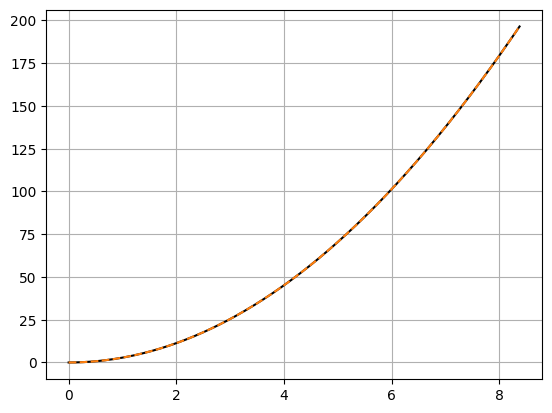

In [91]:
plt.plot(eps_rho, F, 'k-')
plt.plot(eps_rho, r(eps_rho), '--', color='tab:orange')
plt.grid()

In [92]:
r.eval_deriv(eps_rho)

array([-3.03904200e-07,  2.59860440e-01,  5.18984484e-01,  7.77371770e-01,
        1.03502229e+00,  1.29193606e+00,  1.54811311e+00,  1.80355334e+00,
        2.05825680e+00,  2.31222355e+00,  2.56545354e+00,  2.81794680e+00,
        3.06970324e+00,  3.32072295e+00,  3.57100584e+00,  3.82055201e+00,
        4.06936139e+00,  4.31743406e+00,  4.56476989e+00,  4.81136900e+00,
        5.05723132e+00,  5.30235692e+00,  5.54674568e+00,  5.79039772e+00,
        6.03331291e+00,  6.27549143e+00,  6.51693312e+00,  6.75763801e+00,
        6.99760618e+00,  7.23683756e+00,  7.47533215e+00,  7.71308996e+00,
        7.95011098e+00,  8.18639521e+00,  8.42194271e+00,  8.65675337e+00,
        8.89082729e+00,  9.12416448e+00,  9.35676483e+00,  9.58862844e+00,
        9.81975521e+00,  1.00501452e+01,  1.02797985e+01,  1.05087150e+01,
        1.07368947e+01,  1.09643376e+01,  1.11910438e+01,  1.14170131e+01,
        1.16422457e+01,  1.18667415e+01,  1.20905005e+01,  1.23135228e+01,
        1.25358082e+01,  

In [93]:
import os
os.getcwd()

'/Users/rune.hoejlund/Development/DTU/plasma-ray-tracer/misc'

In [106]:
out = np.load('../aaa-test.npz')
_x = out['x']
_y = out['y']

In [113]:
r = aaa(_x, _y)
r.eval_deriv(_x[0], k=2)

/Users/rune.hoejlund/opt/anaconda3/envs/mgo/lib/python3.9/site-packages/baryrat.py:203: RuntimeWarning: divide by zero encountered in scalar divide
  return -np.sum(dd * self.weights) / self.weights[i] * math.factorial(k)
/Users/rune.hoejlund/opt/anaconda3/envs/mgo/lib/python3.9/site-packages/baryrat.py:200: RuntimeWarning: invalid value encountered in divide
  dd = (dd1 - self.eval_deriv(x, k=1)) / dx
/Users/rune.hoejlund/opt/anaconda3/envs/mgo/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


nan

In [112]:
from baryrat import floater_hormann
r = floater_hormann(_x, _y, blending=62)

1.6502575934912623e+155

In [118]:
import sys
sys.path.append('../')
import finite_diff as fd

In [129]:
fd.grad(fd.grad(r(_x[:4]), _x[:4]), _x[:4])[0]

5.637039616686509

365

In [105]:
r.eval_deriv(_x[0])

8.283880081767004e+207

array([ 0.00000000e+00,  2.49994556e-12, -5.70429814e-12,  3.89088553e-11,
        4.55765842e-11, -2.81614565e-10,  3.89977356e-10, -3.80021015e-10,
        4.45458892e-10,  1.79653459e-10, -4.45872006e-10, -4.40749326e-10,
        3.60409147e-10,  4.72391015e-10,  1.41952050e-09,  3.28929550e-10,
        1.52737334e-09,  6.80896894e-10, -1.64174874e-09,  5.56730217e-10,
       -7.90510768e-10, -3.46013662e-09, -4.32579439e-09,  6.92810254e-10,
       -3.32226557e-09, -2.39770870e-10, -2.83226509e-09, -2.72955525e-09,
       -3.72514464e-10, -4.96739716e-09, -4.44052350e-09,  4.60657379e-09,
       -3.12830473e-09, -3.51587026e-09, -1.27156952e-09, -3.86597154e-09,
        4.37883507e-09,  1.03307585e-10,  8.14522672e-10,  4.88194551e-09,
        1.53344182e-09,  8.51162696e-10,  3.76750187e-09,  2.06114947e-09,
       -1.64688885e-09, -3.38972264e-08,  4.96040471e-08, -2.60185047e-08,
       -1.48135015e-08,  4.99935329e-08, -4.40036203e-08,  1.16043779e-08,
        4.60388563e-08,  

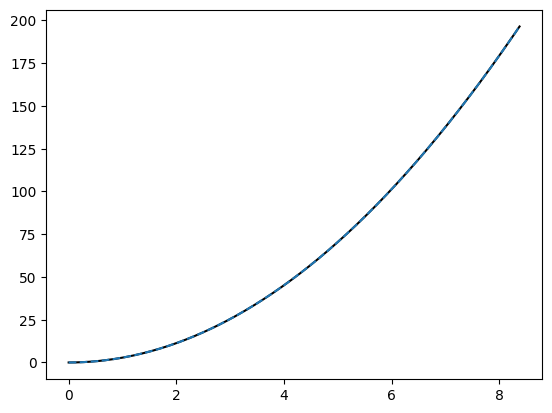

In [77]:
r = aaa(np.round(_x, 10), np.round(_y, 10))
plt.plot(_x, _y, 'k-')
plt.plot(_x, r(_x), '--')

In [82]:
r.eval_deriv(np.round(_x[0], 10), k=2)

5.656854252608146

In [78]:
r.weights

array([ 3.36059234e-02, -1.69805683e-05,  9.49841964e-03,  5.07518478e-02,
        2.17272015e-02,  2.43616329e-03,  6.69677912e-03, -1.04973668e-03,
       -1.48436763e-02, -4.48859579e-03,  2.34278465e-04, -7.70623195e-03,
       -8.14703008e-02,  4.01927716e-03, -2.17984636e-03, -5.79675609e-03,
        4.57863327e-04,  2.50246310e-03, -3.55954768e-03,  6.23068823e-03,
        1.67472906e-01,  2.68725113e-03,  2.76060914e-03,  8.08845333e-03,
       -8.30068637e-02, -3.50973069e-03,  1.48577112e-02, -6.37584254e-02,
        5.33435299e-03, -4.15627928e-03,  3.64432229e-02,  9.08149874e-04,
        1.29037149e-03, -4.90347269e-03, -5.51577824e-02, -2.63201188e-02,
       -6.75762669e-03, -3.16168485e-02, -9.43976709e-03,  8.22196576e-03,
        2.00593968e-04,  5.16874294e-03,  2.25719519e-03,  2.43165545e-03,
        2.99364166e-04, -3.44843677e-02, -3.97718555e-03, -3.86502266e-03,
        3.51455379e-01,  3.66189709e-02, -1.97408696e-03,  1.04829024e-02,
       -8.07356883e-03,  

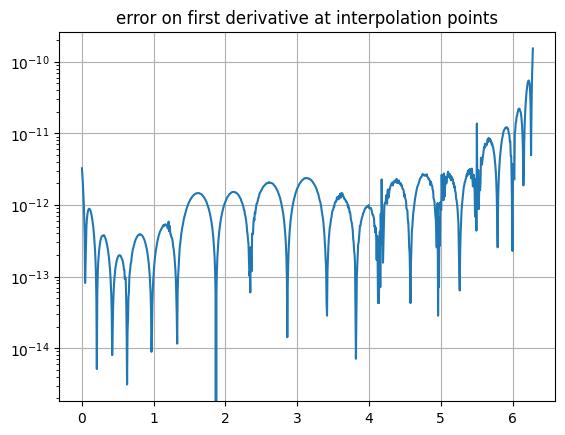

In [39]:
plt.plot(xi, np.abs(dfdx(xi) - r.eval_deriv(xi)))
plt.gca().set_yscale('log')
plt.grid()
plt.title('error on first derivative at interpolation points')
plt.show()

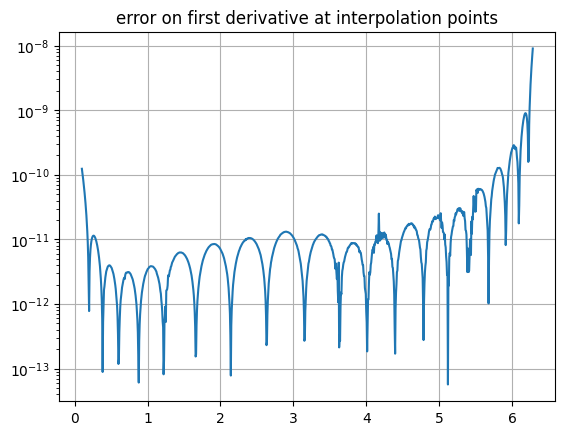

In [31]:
plt.plot(xi, np.abs(dfdx2(xi) - r.eval_deriv(xi, k=2)))
plt.gca().set_yscale('log')
plt.grid()
plt.title('error on first derivative at interpolation points')
plt.show()

In [110]:
r.nodes, r.values, r.poles(), r.weights

(array([5.49713472, 2.35912176, 6.03561032, 6.28318531, 0.1       ,
        4.17879792, 1.26360244, 5.02674225, 0.69417997, 3.61556482,
        0.39708998]),
 array([-1.72640799e+02,  7.46042449e+00, -1.02445612e+02, -1.31157628e-13,
         1.10332989e-01, -5.62114800e+01,  3.37250928e+00, -1.44965735e+02,
         1.28083294e+00, -1.69663521e+01,  5.75266434e-01]),
 array([ 1.17997755+9.92852916j,  1.17997755-9.92852916j,
         4.78656298+9.06231455j,  4.78656298-9.06231455j,
        11.52159767+3.52428235j, 11.52159767-3.52428235j,
         7.54684778+7.69827101j,  7.54684778-7.69827101j,
         9.76838259+5.89229473j,  9.76838259-5.89229473j]),
 array([-0.0818438 , -0.13131919,  0.03073549, -0.00972959, -0.15038429,
        -0.17495902,  0.31524876,  0.1207665 , -0.66619318,  0.16829067,
         0.57938761]))

In [158]:
weights = r.weights
values = r.values
nodes = r.nodes

alpha = lambda x: np.sum(1/(x - nodes)) - 1/(x - nodes)
beta = lambda x: alpha(x)/(x - nodes)
dfdx = lambda x: ((weights*values).T @ beta(x)) / (weights.T @ beta(x))

In [204]:
weights = r.weights
values = r.values
nodes = r.nodes

alpha = lambda x: np.sum(1/(np.outer(x, np.ones(nodes.shape)) - nodes).squeeze()) - 1/(np.outer(x, np.ones(nodes.shape)) - nodes).squeeze()
beta = lambda x: alpha(x)/(np.outer(x, np.ones(nodes.shape)) - nodes).squeeze()
dfdx = lambda x: (beta(x) @ (weights*values)) / (beta(x) @ weights)

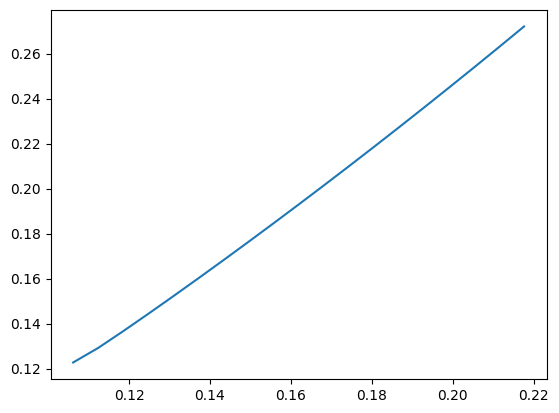

In [211]:

plt.plot(xi[1:20], dfdx(xi[1:20]))

In [190]:
beta(xi[1:5]).shape

(4, 11)

In [201]:
(weights*values).shape

(11,)

In [203]:
beta(xi[1:5]) @ (weights*values)

array([-482.22955508, -402.2163306 , -330.49802531, -288.14061447])

In [187]:
alpha(xi[1:5]).shape

(4, 11)

In [140]:
weights.shape, values.shape, nodes.shape

((11,), (11,), (11,))

In [157]:
np.outer(xi, np.ones(nodes.shape)) - nodes

array([[-4.49713472, -1.35912176, -5.03561032, -5.28318531,  0.9       ,
        -3.17879792, -0.26360244, -4.02674225,  0.30582003, -2.61556482,
         0.60291002]])

In [154]:
np.outer(xi, np.ones(nodes.shape)).shape, nodes.shape

((1000, 11), (11,))

In [145]:
1/(np.outer(xi, np.eye()) - nodes)

ValueError: operands could not be broadcast together with shapes (1000,) (11,) 

In [144]:
alpha(0)

array([-16.21380371, -15.97183011, -16.23003334, -16.23656172,
        -6.39571666, -16.1564134 , -15.60432851, -16.19678066,
       -14.95516804, -16.1191347 , -13.87739578])

In [122]:
alpha(1)

array([-0.53658982-0.10068677j, -0.53658982+0.10068677j,
       -0.4991612 -0.09394543j, -0.4991612 +0.09394543j,
       -0.45296011-0.02862371j, -0.45296011+0.02862371j,
       -0.47430852-0.07538117j, -0.47430852+0.07538117j,
       -0.45984784-0.0527966j , -0.45984784+0.0527966j ])

In [117]:
alpha(1)

(-0.5384149964628216+1.3877787807814457e-17j)

In [113]:
alpha(np.array([1]))

TypeError: unsupported operand type(s) for -: 'int' and 'method'

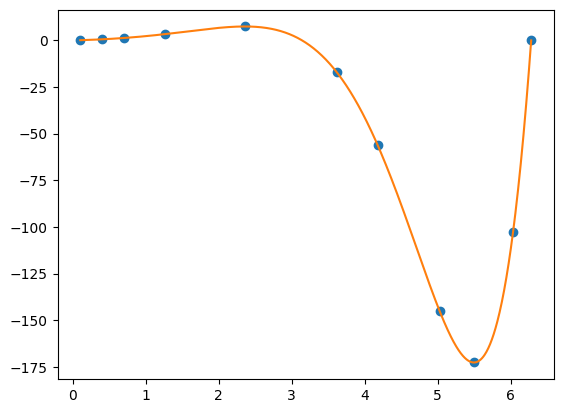

In [106]:
asort = np.argsort(r.nodes)
plt.plot(r.nodes[asort], r.values[asort], 'o')
plt.plot(xi, r(xi), '-')

In [91]:
r.poles(), r.zeros(), r.weights

(array([ 1.17997755+9.92852916j,  1.17997755-9.92852916j,
         4.78656298+9.06231455j,  4.78656298-9.06231455j,
        11.52159767+3.52428235j, 11.52159767-3.52428235j,
         7.54684778+7.69827101j,  7.54684778-7.69827101j,
         9.76838259+5.89229473j,  9.76838259-5.89229473j]),
 array([ 9.42343443e+00+0.j        , -5.18592660e+00+5.21041524j,
        -5.18592660e+00-5.21041524j,  3.14159265e+00+0.j        ,
        -5.31243965e+00+2.13764406j, -5.31243965e+00-2.13764406j,
        -5.10365133e+00+0.j        , -3.14234145e+00+0.j        ,
        -1.56206831e-12+0.j        ,  6.28318531e+00+0.j        ]),
 array([-0.0818438 , -0.13131919,  0.03073549, -0.00972959, -0.15038429,
        -0.17495902,  0.31524876,  0.1207665 , -0.66619318,  0.16829067,
         0.57938761]))

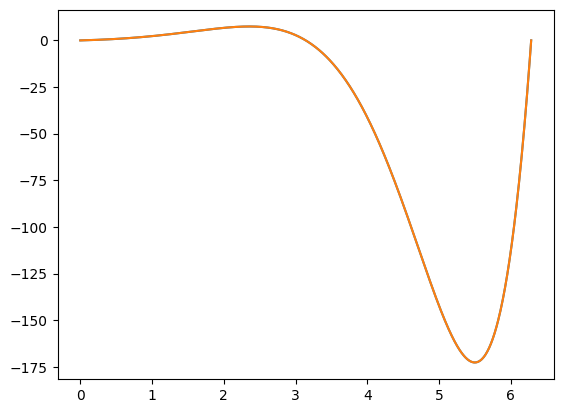

In [62]:
plt.plot(xi, F)
plt.plot(xi, r(xi))

In [57]:
xi = np.linspace(-1, 1, 100)
yi = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xi, yi, indexing='ij')
Z = X + 1j*Y

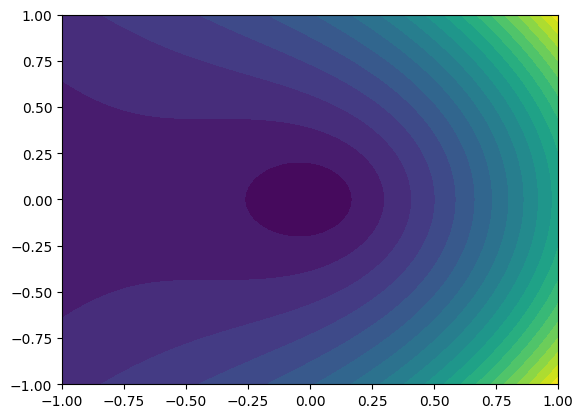

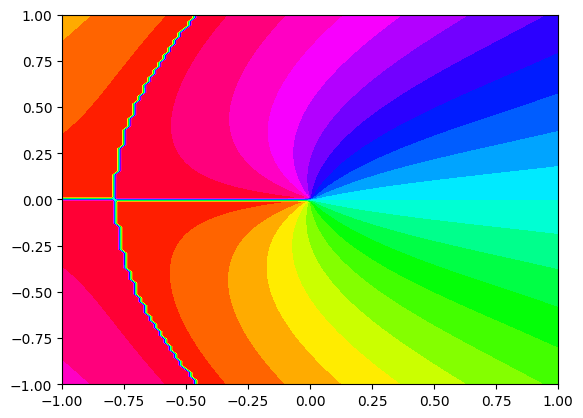

In [59]:
plt.contourf(X, Y, np.abs(f(Z)), levels=20)
plt.show()

plt.contourf(X, Y, np.angle(f(Z)), levels=20, cmap='hsv')
plt.show()

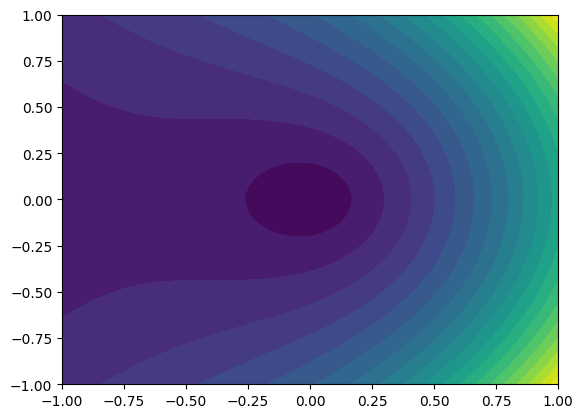

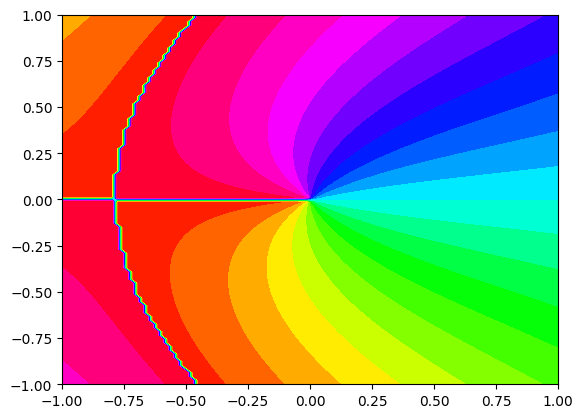

In [60]:
plt.contourf(X, Y, np.abs(r(Z)), levels=20)
plt.show()

plt.contourf(X, Y, np.angle(r(Z)), levels=20, cmap='hsv')
plt.show()

In [72]:
from baryrat import interpolate_rat
import matplotlib as mpl

# create 9 interpolation nodes in a circle
n = 9
nodes = np.exp(np.arange(n) / n * 2j * np.pi)

# interpolate the complex exp function as a degree (4,4) rational function
r = interpolate_rat(nodes, np.exp(nodes))
# compute poles and zeros
poles, zer = r.poles(), r.zeros()


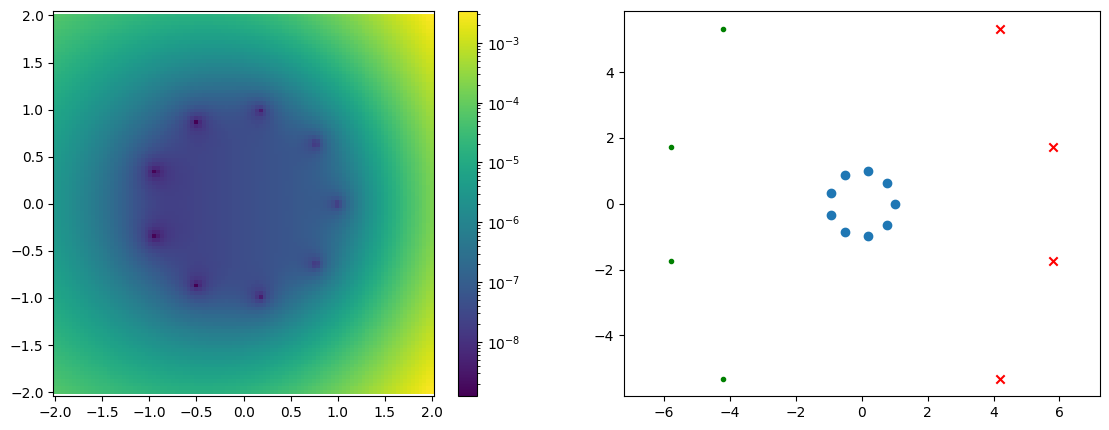

In [74]:
# plot the approximation error and the nodes, poles and zeros
plt.figure(figsize=(13.5, 5))

plt.subplot(1, 2, 1)
Y, X = np.ogrid[-2:2:100j, -2:2:100j]
Z = X + 1j * Y
plt.pcolormesh(X.flat, Y.flat, abs(r(Z) - np.exp(Z)), norm=mpl.colors.LogNorm())
plt.colorbar();
plt.axis('equal');

plt.subplot(1, 2, 2)
plt.scatter(np.real(nodes), np.imag(nodes))
plt.scatter(np.real(poles), np.imag(poles), marker='x', c='r')
plt.scatter(np.real(zer), np.imag(zer), marker='.', c='g')
plt.axis('equal');